<a href="https://colab.research.google.com/github/fedenemi/analysis_argentina/blob/main/arg_proy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://datos.gob.ar/

In [1]:
#import libraries and set up notebook for matplotlib
%matplotlib
%matplotlib inline
from google.colab import files,drive

import requests, json
from bs4 import BeautifulSoup
import re   
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
from google.colab import files
import csv
import io
from __future__ import division
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import seaborn as sns
import glob

Using matplotlib backend: agg


In [2]:
drive.mount('/content/drive')
!ls drive/MyDrive/'Colab Notebooks'/arg_proyecto/Arg_proyecto/

mypath='drive/MyDrive/Colab Notebooks/arg_proyecto/Arg_proyecto/'
xcsv_files = glob.glob(os.path.join(mypath, "*.xlsx"))
csv_files = glob.glob(os.path.join(mypath, "*.csv"))
  
fs=[]  

for f in xcsv_files:
    
    df = pd.read_excel(f)
    fs.append(df)  
    
for f in csv_files:
    
    # read the csv file
    try:
        df = pd.read_csv(f,encoding="cp1252",sep=',', error_bad_lines=False, engine='python');
        fs.append(df)

    except:
        pass

   
len(fs)

Mounted at /content/drive
 actividad.csv
 Aprender2018-primaria-6.csv
 base_eneshogares.csv
 base_enespersonas.csv
 bibliotecas-especializadas.csv
 bibliotecas-populares.csv
 casas-del-bicentenario.csv
'CENPE 2014 - Docentes por función.xlsx'
'CENPE 2014 - Docentes por nivel.xlsx'
'CENPE 2014 - Docentes por sexo y edad.xlsx'
'CENPE 2014 - Docentes por tipo de institución.xlsx'
 cuadros_indicadores_de_proceso_2017-2018_segun_estructura_prov.xlsx
 encc_2017.csv
 equipos-sistemas-nacionales.csv
 estadistica-inscripciones-iniciales-automotores-2000-01-2021-05.csv
 estadistica-inscripciones-iniciales-motovehiculos-2007-01-2021-05.csv
 estadistica-transferencias-automotores-2000-01-2021-05.csv
 estadistica-transferencias-motovehiculos-2007-01-2021-05.csv
 gasto-publico-cultural-nacional-de-la-administracion-publica-nacional-apn..csv
 hogares-con-ingresos-por-debajo-linea-indigencia-eph-puntual-continua.csv
 indices-de-salarios-industriales-basicos-de-convenios-en-la-capital-federal.-variac

Skipping line 23: Expected 1 fields in line 23, saw 2
Skipping line 121: Expected 1 fields in line 121, saw 2
Skipping line 122: Expected 1 fields in line 122, saw 2
Skipping line 152: Expected 1 fields in line 152, saw 3
Skipping line 153: Expected 1 fields in line 153, saw 3
Skipping line 240: Expected 1 fields in line 240, saw 2
Skipping line 241: Expected 1 fields in line 241, saw 2
Skipping line 284: Expected 1 fields in line 284, saw 2
Skipping line 285: Expected 1 fields in line 285, saw 2
Skipping line 286: Expected 1 fields in line 286, saw 2
Skipping line 299: Expected 1 fields in line 299, saw 2
Skipping line 307: Expected 1 fields in line 307, saw 2
Skipping line 322: Expected 1 fields in line 322, saw 2
Skipping line 324: Expected 1 fields in line 324, saw 2
Skipping line 325: Expected 1 fields in line 325, saw 2
Skipping line 330: Expected 1 fields in line 330, saw 2
Skipping line 338: Expected 1 fields in line 338, saw 2
Skipping line 339: Expected 1 fields in line 339, 

32

In [3]:
# !pwd
# !ls
# !unzip 

fs[0]=fs[0].iloc[np.r_[10:11,12:38],:].reset_index(drop=True)
fs[0].rename(columns=fs[0].iloc[0], inplace = True)
## fs[0].drop(fs[0].iloc[:,0]) #reset_index(drop=True, inplace=True)
fs[0].drop(fs[0].index[0],inplace=True)
fs[0].columns=["provincia", "nan",   'Total',  '1° Año',  '2° Año',  '3° Año',
        '4° Año',  '5° Año',  '6° Año',  '7° Año',   'Total',  '7° Año',
        '8° Año',  '9° Año', '10° Año', '11° Año', '12° Año']
fs[0].provincia=fs[0].provincia.apply(lambda x: x.lower())
fs[0]

,provincia,nan,Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año,7° Año,Total,7° Año,8° Año,9° Año,10° Año,11° Año,12° Año
1,buenos aires ...,6-6,96.1602,100.608,92.926,94.451,95.4429,95.1313,98.6819,NaN,80.7619,86.3512,76.2978,83.0916,78.0813,82.1673,77.0358
2,conurbano,6-6,95.5333,99.807,92.2668,93.6684,94.7987,94.6738,98.309,NaN,80.2608,86.8747,76.0646,82.9162,77.5664,80.974,74.5848
3,resto de bs as,6-6,97.204,101.957,94.0319,95.772,96.5256,95.877,99.2884,NaN,81.5935,85.5069,76.6786,83.3814,78.9559,84.2284,81.1502
4,catamarca ...,6-6,98.0793,100.263,98.1776,97.0084,97.7952,97.0564,98.192,NaN,82.4916,82.491,77.9683,81.9214,83.7626,87.37,83.2242
5,chaco ...,7-5,94.5658,97.094,95.0741,92.7244,94.3469,93.3359,92.7139,96.4693,75.6702,NaN,70.9734,72.646,77.9832,83.1491,78.6059
6,chubut ...,6-6,97.7365,100.266,96.7579,96.9989,96.8765,96.5955,99.013,NaN,81.0079,82.4262,77.6976,80.6703,80.2262,83.6811,82.7526
7,ciudad de buenos aires ...,7-5,98.5883,99.5759,97.3905,97.6408,97.9418,98.3087,98.3366,100.991,83.3494,NaN,83.8714,83.1455,85.0321,86.8226,76.7048
8,cordoba ...,6-6,99.2158,100.322,98.5459,98.7798,99.0231,99.3761,99.2847,NaN,83.4353,84.2892,84.3807,82.7068,80.9787,91.5487,75.6371
9,corrientes ...,6-6,88.3546,92.7607,89.4818,83.5048,83.882,85.4678,95.5533,NaN,80.557,78.1684,75.5325,79.7502,80.7414,84.0255,92.0055
10,entre rios ...,6-6,93.7638,94.8106,92.2665,92.8187,93.2811,92.5994,96.8607,NaN,77.36,77.1247,70.5059,75.0959,76.2988,87.3613,85.709


In [4]:
fs[1]=fs[1].iloc[np.r_[9:10,11:36],:].reset_index(drop=True)
fs[1].rename(columns=fs[1].iloc[0],inplace=True)
fs[1].drop(fs[1].index[0],inplace=True)
fs[1].rename(columns={"Provincia":"provincia"},inplace=True)
fs[1].provincia=fs[1].provincia.apply(lambda x: x.lower())
fs[1]

,provincia,Total,Inicial,Primario,Secundario,Superior
1,total país,852921,120751,352239,399905,90613
2,buenos aires,289797,50541,111932,145218,24611
3,catamarca,12731,1095,5467,6526,1999
4,chaco,28565,2683,13236,12488,3179
5,chubut,11579,1686,3975,5696,1467
6,ciudad de buenos aires,72728,13057,27118,25961,12310
7,córdoba,73437,8340,26597,39197,8551
8,corrientes,20860,2364,9031,9772,2580
9,entre ríos,30408,2982,12723,15637,2981
10,formosa,13987,1649,6900,5618,1196


In [5]:
fs[2]=fs[2].iloc[np.r_[9:10,11:86],:].reset_index(drop=True)
fs[2].rename(columns=fs[2].iloc[0],inplace=True)
fs[2].drop(fs[2].index[0],inplace=True)

fs[2]=fs[2].groupby(['Provincia','Función'])
fs[2]=fs[2][['Provincia', 'Docentes','Función']].sum().unstack()
fs[2].columns=['Apoyo docente','Direccion/Gestion',
       'Frente a alumnos']
fs[2].reset_index(inplace=True)
fs[2].rename(columns={"Provincia":"provincia"},inplace=True)
fs[2].provincia=fs[2].provincia.apply(lambda x: x.lower())
fs[2]


,provincia,Apoyo docente,Direccion/Gestion,Frente a alumnos
0,buenos aires,60817,32917,232361
1,catamarca,2297,1344,10564
2,chaco,4369,3147,24586
3,chubut,1997,1183,9666
4,ciudad de buenos aires,16862,7705,57134
5,corrientes,3017,2624,18408
6,córdoba,14216,7933,61367
7,entre ríos,5400,3555,26644
8,formosa,2239,1507,11847
9,jujuy,2638,1776,15327


In [6]:
fs[3]=fs[3].iloc[np.r_[9:10,11:3964],:].reset_index(drop=True)
fs[3].rename(columns=fs[3].iloc[0],inplace=True)
fs[3].drop(fs[3].index[0],inplace=True)

fs[3]=fs[3][['Edad','Provincia', 'Docentes']]
fs[3]=fs[3][fs[3]["Edad"]!="Sin información"]
fs[3]["Edad"]=fs[3]["Edad"].astype(float)
fs[3]['Docentes']=fs[3]['Docentes'].astype(float)

fs[3]["Edad"]=pd.cut(fs[3]["Edad"],np.arange(15, 85, 13))

fs[3]=fs[3].groupby(['Provincia',"Edad"]).mean().unstack()
fs[3].columns=["maestros_para_(15-28]", "mstr_(28-41]", "mstr_(41-54]", "mstr_(54-67]", "mstr_(67-80]"] # maestros de alumnos de edades de rangos
fs[3]=fs[3].reset_index()                                                   
fs[3].rename(columns={"Provincia":"provincia"},inplace=True)
fs[3].provincia.apply(lambda x: x.lower())

fs[3]



,provincia,maestros_para_(15-28],mstr_(28-41],mstr_(41-54],mstr_(54-67],mstr_(67-80]
0,Buenos Aires,704.194444,2921.000000,2752.846154,752.512821,84.233333
1,Catamarca,43.518519,147.828571,142.971429,35.366667,2.714286
2,Chaco,104.935484,337.638889,273.256410,57.939394,3.913043
3,Chubut,45.034483,132.368421,109.473684,22.727273,3.300000
4,Ciudad de Buenos Aires,246.514286,648.538462,697.179487,254.552632,17.620690
5,Corrientes,57.967742,193.692308,233.263158,60.885714,3.058824
6,Córdoba,187.090909,708.307692,818.256410,197.428571,6.840000
7,Entre Ríos,120.838710,332.974359,298.564103,40.400000,2.666667
8,Formosa,43.560000,152.942857,185.606061,40.366667,3.411765
9,Jujuy,28.320000,165.500000,206.410256,62.028571,2.809524


In [7]:
fs[4]=fs[4].iloc[np.r_[9:10,11:210],:].reset_index(drop=True)
fs[4].rename(columns=fs[4].iloc[0],inplace=True)
fs[4].drop(fs[4].index[0],inplace=True)
fs[4]['Docentes']=fs[4]['Docentes'].astype(float)
fs[4]=fs[4].groupby(['Provincia', 'Tipo de institución']).mean().unstack()
fs[4].columns=['Institutos Superiores',
            'Organismos internacionales',
            'Organismos oficiales',
            'Organizaciones no gubernamentales',
            'Otras instituciones',
            'Sin información',
            'Sindicatos y gremios',
            'Universidades']
fs[4]=fs[4].reset_index()
fs[4].rename(columns={"Provincia":"provincia"},inplace=True)
fs[4].provincia=fs[4].provincia.apply(lambda x: x.lower())
fs[4]

,provincia,Institutos Superiores,Organismos internacionales,Organismos oficiales,Organizaciones no gubernamentales,Otras instituciones,Sin información,Sindicatos y gremios,Universidades
0,buenos aires,8113.0,822.0,54358.0,3063.0,16037.0,593.0,4199.0,6770.0
1,catamarca,737.0,35.0,3222.0,340.0,935.0,9.0,355.0,1121.0
2,chaco,2003.0,63.0,16620.0,373.0,3035.0,36.0,1107.0,709.0
3,chubut,534.0,44.0,2464.0,220.0,668.0,48.0,459.0,512.0
4,ciudad de buenos aires,2410.0,595.0,12001.0,1140.0,5345.0,75.0,6171.0,3591.0
5,corrientes,1360.0,66.0,3372.0,446.0,1345.0,66.0,2487.0,919.0
6,córdoba,4150.0,439.0,26788.0,2442.0,7806.0,260.0,4581.0,6166.0
7,entre ríos,2818.0,168.0,10547.0,1237.0,4124.0,133.0,3442.0,2857.0
8,formosa,709.0,28.0,4535.0,136.0,592.0,11.0,599.0,288.0
9,jujuy,2233.0,66.0,4917.0,411.0,1343.0,155.0,737.0,1868.0


In [ ]:
# datiime without provinces
fs[5].iloc[:,0]=fs[5].iloc[:,0].astype("datetime64")

In [45]:
fs[6].iloc[:,0]=fs[6].iloc[:,0].astype("datetime64")
fs[6]

,indice_tiempo,total,agri_ganaderia_caza_silvicultura,agri_ganaderia_caza_serv_conexos,silvicultura_extr_madera_serv_conexos,pesca,explotacion_minas_canteras,extr_c_lig_turba_petro_crudo_gas_nat_act_rel_exc_act_prosp,extr_minerales_metaliferos_explotacion_minas_canteras_ncp,ind_manufacturera,elaboracion_prods_alimenticios_bebidas,elaboracion_prods_tabaco,fabr_prods_textiles,fabr_prendas_vestir_terminacion_tenido_pieles,curtido_term_cueros_fabr_art_marroq_talab_calzado_partes,prod_mad_fabr_mad_corcho_exc_mue_fabr_art_paja_mat_trenz,fabr_papel_prods_papel,edicion_impresion_reprod_grabaciones,fabr_coque_prods_refinacion_petro_comb_nuclear,fabr_sustancias_prods_quimicos,fabr_prods_caucho_plastico,fabr_prods_minerales_no_metalicos,fabr_metales_comunes,fabr_prods_elaborados_metal_excepto_maquinaria_equipo,fabr_maquinaria_equipo_ncp,fabr_maquinaria_oficina_contabilidad_informatica,fabr_maquinaria_aparatos_electricos_ncp,fabr_eq_aparatos_radio_television_comunicaciones,fabr_instrumentos_medicos_opticos_precision_fabr_relojes,fabr_vehiculos_automotores_remolques_semirremolques,fabr_equipo_transporte_ncp,fabr_muebles_colchones_inds_manufactureras_ncp,reciclamiento,reparacion_mantenimiento_instalacion_maq_eq,electricidad_gas_agua,generacion_captacion_distribucion_energia_electrica,fabr_gas_distribucion_combs_gaseosos_por_tuberias,captacion_depuracion_distribucion_agua,construccion,comercio_mayorista_minorista_reparaciones,hoteles_restaurantes,hoteles_campamentos_otros_tipos_hospedaje_temporal,restaurantes_bares_cantinas,transporte_comunicaciones,transporte,comunicaciones,intermediacion_financiera,intermediacion_financiera_otros_serv_financieros,serv_seguros,serv_auxiliares_actividad_financiera,act_inmobiliarias_empresariales_alquiler,serv_inmobiliarios_bienes_propios_arrendados,resto,adm_publica_defensa_planes_seg_soc_afiliacion_obligatoria,ensenianza,ensenianza_publica,ensenianza_privada,serv_sociales_salud,salud_publica,salud_privada,otras_act_serv_comunitarias_sociales_personales,eliminacion_desperdicios_aguas_resid_sanea_serv_similares,asociaciones,serv_culturales_deportivos_otras_act,serv_organizaciones_organos_extraterritoriales,no_clasificados
0,2004-01-01,1163.371169,677.444038,677.108004,686.534216,2555.625312,3159.808201,4076.131358,1528.418368,1384.540337,1193.525146,2639.477904,1089.466225,751.531805,1018.930832,754.821150,1518.350536,1674.750681,4115.245538,2582.985178,1268.074820,1375.722638,2027.265473,984.827005,1252.753250,1314.543089,1233.484390,1801.691591,1207.226531,1720.110861,1243.618710,883.529659,1095.799644,1108.884673,2558.221773,2865.947307,2599.479850,1586.349279,817.191214,1031.736406,749.448729,950.742827,654.571722,1463.307525,1297.257763,1984.007068,2599.780138,3416.982473,1987.988103,2023.098432,991.241274,904.035217,998.103750,0.0,592.632171,0.0,592.632171,994.774581,0.0,994.774581,1044.274869,1301.225782,1058.501739,967.112019,803.164621,1222.768107
1,2004-04-01,1296.598444,761.290772,760.650866,778.689878,3054.005229,3261.370470,4157.584649,1691.307448,1579.811939,1376.226718,2716.130845,1213.448147,851.507663,1188.057756,854.380985,1739.787247,1883.294467,4714.743140,2920.876292,1475.101395,1525.657916,2468.100790,1122.913555,1440.093687,1541.929523,1404.457126,1899.522629,1351.755322,1955.346545,1281.261394,1022.015985,1328.406956,1228.867555,2578.869935,2781.297038,2801.300276,1847.668739,923.729075,1153.199408,861.653898,1095.970479,758.929102,1662.365277,1502.920782,2168.883107,2513.996985,3034.237215,2144.664209,2006.134050,1108.154624,1031.883624,1113.951955,0.0,684.045699,0.0,684.045699,1104.605522,0.0,1104.605522,1232.502949,1528.905168,1292.626332,1096.119197,923.312702,1461.942834
2,2004-07-01,1124.951229,693.161382,693.104387,694.658370,2431.356875,2838.154096,3611.425724,1487.282167,1353.369269,1208.234139,2287.331516,1055.928408,750.762665,1056.635967,793.299729,1499.482267,1621.766605,3671.032119,2366.248133,1263.688784,1324.432538,2006.579912,970.746461,1239.149670,1362.673819,1246.209

In [8]:
fs[7].iloc[:,0]=fs[7].iloc[:,0].astype("datetime64")
fs[7]=fs[7].T.reset_index()
fs[7].rename(columns=fs[7].iloc[0],inplace=True)
fs[7].drop(fs[7].index[0],inplace=True)
fs[7].rename(columns={'indice_tiempo': 'provincia'},inplace=True)
fs[7].provincia=fs[7].provincia.replace("_"," ", regex=True)
fs[7].provincia=fs[7].provincia.apply(lambda x: x.lower())
fs[7]


,provincia,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00
1,total sector privado,1570.25,1894.25,2382.25,2852.25,3591.5,4722,6079.75,7681.5,10147.2
2,caba,1927.5,2293.75,2846.75,3430.5,4261.75,5516.25,7050.5,8914.5,11826.2
3,provincia buenos aires,1534,1839.25,2320.75,2774,3495.25,4610.75,5918.5,7437.5,9817
4,catamarca,1298,1570.75,1965.5,2318.5,2894.25,3841.25,5325.5,6618.5,8619.5
5,cordoba,1309.75,1587.75,1992.25,2390.75,3026.75,4005.5,5198,6617.75,8762.75
6,corrientes,1149.75,1365,1719.5,2041.75,2550,3374.5,4470,5694.5,7451
7,chaco,1079.75,1295.75,1625,1922.75,2605.5,3510,4663.25,6073.25,7684.5
8,chubut,2233.75,2809.5,3770.75,4683,6055.75,8178,10140,12536,16770.8
9,entre rios,1145.75,1397.25,1767.5,2105.25,2696.25,3546.5,4587.5,5825,7678.5
10,formosa,1060,1284,1658,1985.75,2524.25,3373,4423.75,5640.5,7409.5


In [ ]:
fs[8].iloc[:,0]=fs[8].iloc[:,0].astype("datetime64")
fs[8]=fs[8].T
fs[8].rename(columns=fs[8].iloc[0],inplace=True)
fs[8].drop(fs[8].index[0],inplace=True)
fs[8].reset_index(inplace=True)
# ee=fs[8]
# ee.index.apply(lambda x: x.split("_")[1:3])

,index,1974-05-01 00:00:00,1974-11-01 00:00:00,1975-05-01 00:00:00,1975-11-01 00:00:00,1976-05-01 00:00:00,1976-11-01 00:00:00,1977-05-01 00:00:00,1977-11-01 00:00:00,1978-05-01 00:00:00,1978-11-01 00:00:00,1979-05-01 00:00:00,1979-11-01 00:00:00,1980-05-01 00:00:00,1980-11-01 00:00:00,1981-05-01 00:00:00,1981-11-01 00:00:00,1982-05-01 00:00:00,1982-11-01 00:00:00,1983-05-01 00:00:00,1983-11-01 00:00:00,1984-05-01 00:00:00,1984-11-01 00:00:00,1985-05-01 00:00:00,1985-11-01 00:00:00,1986-05-01 00:00:00,1986-11-01 00:00:00,1987-05-01 00:00:00,1987-11-01 00:00:00,1988-05-01 00:00:00,1988-11-01 00:00:00,1989-05-01 00:00:00,1989-11-01 00:00:00,1990-05-01 00:00:00,1990-11-01 00:00:00,1991-05-01 00:00:00,1991-11-01 00:00:00,1992-05-01 00:00:00,1992-11-01 00:00:00,1993-05-01 00:00:00,1993-11-01 00:00:00,1994-05-01 00:00:00,1994-11-01 00:00:00,1995-05-01 00:00:00,1995-11-01 00:00:00,1996-05-01 00:00:00,1996-11-01 00:00:00,1997-05-01 00:00:00,1997-11-01 00:00:00,1998-05-01 00:00:00,1998-11-01 00:00:00,1999-05-01 00:00:00,1999-11-01 00:00:00,2000-05-01 00:00:00,2000-11-01 00:00:00,2001-05-01 00:00:00,2001-11-01 00:00:00,2002-05-01 00:00:00,2002-11-01 00:00:00,2003-05-01 00:00:00
0,total_aglomerados_urbanos,0.3857,0.387366,0.386,0.381914,0.378252,0.369972,0.372868,0.375578,0.371704,0.38103,0.372068,0.374784,0.373042,0.375375,0.36883,0.362701,0.35908,0.36729,0.353,0.358,0.36,0.362,0.355,0.359,0.363,0.367,0.371,0.367,0.362,0.37,0.369,0.365,0.357,0.365,0.368,0.371,0.371,0.374,0.374,0.371,0.367,0.358,0.348,0.345,0.34,0.346,0.353,0.365,0.369,0.365,0.369,0.366,0.362,0.368,0.358,0.345,0.328,0.353,0.362
1,gran_buenos_aires,0.388948,0.39585,0.396256,0.391716,0.38556,0.376887,0.38157,0.383376,0.380556,0.3932,0.38122,0.38906,0.383961,0.384938,0.375928,0.37145,0.368713,0.377496,0.36,0.363,0.368,0.37,0.368,0.369,0.377,0.382,0.387,0.379,0.379,0.382,0.387,0.379,0.374,0.379,0.383,0.386,0.387,0.389,0.395,0.391,0.386,0.374,0.366,0.365,0.356,0.365,0.374,0.387,0.392,0.388,0.394,0.393,0.386,0.394,0.374,0.359,0.343,0.371,0.381
2,total_aglomerados_del_interior,0.376245,0.36738,0.36378,0.363226,0.358698,0.352656,0.353028,0.3552,0.355096,0.356085,0.35668,0.35308,0.355623,0.356224,0.350704,0.346656,0.343344,0.35156,0.351,0.344,0.346,0.343,0.337,0.343,0.343,0.345,0.347,0.348,0.346,0.35,0.338,0.343,0.336,0.344,0.345,0.35,0.349,0.352,0.343,0.343,0.341,0.335,0.322,0.321,0.319,0.321,0.328,0.339,0.342,0.337,0.34,0.336,0.333,0.338,0.338,0.327,0.311,0.332,0.341
3,provincia_buenos_aires_bahia_blanca_cerri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,0.358,0.355,0.368,0.342,0.359,0.357,0.361,0.353,0.355,0.343,0.334,0.344,0.367,0.359,0.354,0.336,0.348,0.353,0.333,0.34,0.329,0.329,0.322,0.343,0.356,0.373,0.359,0.365,0.364,0.341,0.351,0.355,0.328,0.32,0.331,0.344
4,provincia_buenos_aires_gran_la_plata,0.376476,0.381199,0.383463,0.368241,NaN,NaN,0.36267,NaN,0.352092,0.346076,0.343116,0.34496,0.352796,0.355051,NaN,0.361125,0.338976,0.35594,0.335,NaN,0.35,0.341,0.349,0.344,0.346,0.358,0.369,0.357,0.35,0.362,0.365,0.357,0.345,0.345,0.36,0.363,0.364,0.373,0.369,0.37,0.35,0.343,0.337,0.341,0.338,0.353,0.348,0.368,0.377,0.37,0.377,0.37,0.375,0.354,0.367,0.37,0.344,0.368,0.374
5,provincia_buenos_aires_mar_del_plata_batan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333,0.322,0.339,0.372,0.375,0.373,0.381,0.365,0.348,0.379,0.365,0.353,0.357,0.344,0.372,0.36
6,provincia_catamarca_gran_catamarca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.311388,0.307692,0.30095,0.302061,0.30745,0.297375,0.29536,0.306072,0.299421,NaN,0.314,0.316,0.313,0.309,0.307,0.318,0.307,0.301,0.304,0.312,0.31,0.305,0.318,0.324,0.331,0.323,0.311,0.311,0.327,0.324,0.32,0.34,0.324,0.32,0.304,0.291,0.306,0.332,0.322,0.314,0.299,0.306,0.33,0.311,0.326,0.309,0.314,0.302,0.32,0.349
7,provincia_cordoba_gran_cordoba,0.38824,0.37367,0.358698,0.36656,0.35343,

In [9]:
bb=fs[10]
bb.columns=["c"]

bb=pd.DataFrame(bb.c.str.split(';').tolist(),
                                 columns = ['Año','Provincia_origen','Localidad_origen','provincia','Localidad_destino','Cantidad_Líneas',"Cantidad_Pasajeros" ,"Cantidad_Servicios",""])
bb[['Cantidad_Líneas',"Cantidad_Pasajeros" ,"Cantidad_Servicios"]]=bb[['Cantidad_Líneas',"Cantidad_Pasajeros" ,"Cantidad_Servicios"]].apply(lambda x: x.astype(float, errors='ignore'))#lambda x:to_n(x)
pr_dest=bb[["provincia","Cantidad_Líneas","Cantidad_Pasajeros","Cantidad_Servicios"]]

ori=bb[["Provincia_origen","Cantidad_Líneas","Cantidad_Pasajeros","Cantidad_Servicios"]]
pr_dest=pr_dest.groupby("provincia").mean().reset_index()
ori=ori.groupby("Provincia_origen").mean().reset_index()
mm=pd.merge(pr_dest,ori,left_on="provincia",right_on="Provincia_origen")

mm.provincia=mm.provincia.apply(lambda x: x.lower())
fs[10]=mm
fs[10]

,provincia,Cantidad_Líneas_x,Cantidad_Servicios_x,Provincia_origen,Cantidad_Líneas_y,Cantidad_Servicios_y
0,#n/a,1.125000,406.371250,#N/A,1.125000,406.371250
1,buenos aires,4.946837,205.679227,BUENOS AIRES,3.193302,286.008880
2,catamarca,2.093750,323.839156,CATAMARCA,2.686441,270.598894
3,chaco,3.209115,312.838973,CHACO,2.743119,293.566642
4,chubut,2.802974,311.039822,CHUBUT,3.260546,336.271784
5,ciudad autonoma de buenos aires,41.000000,39.058000,CIUDAD AUTONOMA DE BUENOS AIRES,9.186715,156.470208
6,cordoba,3.416079,317.797449,CORDOBA,3.079334,274.066431
7,corrientes,3.702756,298.500969,CORRIENTES,3.915691,282.722115
8,entre rios,4.697703,225.732067,ENTRE RIOS,3.848552,234.528831
9,formosa,2.127907,351.045938,FORMOSA,2.173333,271.863587


In [19]:
fs[11]=fs[11]
fs[11].columns=["c"]
fs[11]=pd.DataFrame(fs[11].c.str.split(';').tolist(),
                                 columns = ["PERIODO","MODO","JURISDICCION","GRUPO TARIFARIO","EMPRESA","LINEA","TIPO PASAJE","Suma de CANTIDAD","ACTUALIZACION"])
fs[11]

,PERIODO,MODO,JURISDICCION,GRUPO TARIFARIO,EMPRESA,LINEA,TIPO PASAJE,Suma de CANTIDAD,ACTUALIZACION
0,201301,COLECTIVO,MUNICIPAL,-,AUTOBUSES SANTA FE S.R.L,LINEA 540,NORMAL,12125,201903
1,201301,COLECTIVO,MUNICIPAL,-,AUTOBUSES SANTA FE S.R.L,LINEA 540A,ATRIBUTO SOCIAL,1,201903
2,201301,COLECTIVO,MUNICIPAL,-,AUTOBUSES SANTA FE S.R.L,LINEA 540A,NORMAL,582526,201903
3,201301,COLECTIVO,MUNICIPAL,-,AUTOBUSES SANTA FE S.R.L,LINEA 540A,OTRO,20,201903
4,201301,COLECTIVO,MUNICIPAL,-,AUTOBUSES SANTA FE S.R.L,LINEA 550,NORMAL,890,201903
...,...,...,...,...,...,...,...,...,...
107478,201910,TREN,FFCC,-,SOFSE- SARMIENTO,SARMIENTO DIESEL MORENO - MERCEDES,NORMAL,2807,201911
107479,201910,TREN,FFCC,-,SOFSE- SARMIENTO,SARMIENTO MERLO - LOBOS,ATRIBUTO SOCIAL,32770,201911
107480,201910,TREN,FFCC,-,SOFSE- SARMIENTO,SARMIENTO MERLO - LOBOS,NORMAL,82845,201911
107481,201910,TREN,FFCC,-,SOFSE- TREN DE LA COSTA,FFCC TREN DE LA COSTA,ATRIBUTO SOCIAL,6498,201911


In [84]:
fs[14]=fs[14]

fs[14].columns=["c"]
fs[14]=pd.DataFrame(fs[14].c.str.split(';').tolist(),
                                 columns = ["organizacion_id","tipo_institucion_id","nivel","estado_organizacion_id","institucion_nivel1_id","institucion_nivel2_id","institucion_nivel3_id","institucion_nivel4_id","institucion_nivel5_id","institucion_nivel6_id","institucion_nivel1_descripcion","institucion_nivel2_descripcion","institucion_nivel3_descripcion","institucion_nivel4_descripcion","institucion_nivel5_descripcion","institucion_nivel6_descripcion"])
fs[14]

,organizacion_id,tipo_institucion_id,nivel,estado_organizacion_id,institucion_nivel1_id,institucion_nivel2_id,institucion_nivel3_id,institucion_nivel4_id,institucion_nivel5_id,institucion_nivel6_id,institucion_nivel1_descripcion,institucion_nivel2_descripcion,institucion_nivel3_descripcion,institucion_nivel4_descripcion,institucion_nivel5_descripcion,institucion_nivel6_descripcion
0,348,73,2,3,00636,00348,,,,,COMISION DE INVESTIGACIONES CIENTIFICAS DE LA ...,LABORATORIO DE INVESTIGACIONES DE METALURGIA F...,,,,
1,348,75,4,3,00339,00345,00350,00348,,,UNIVERSIDAD NACIONAL DE LA PLATA,FACULTAD DE INGENIERIA,DEPARTAMENTO DE MECANICA,LABORATORIO DE INVESTIGACIONES DE METALURGIA F...,,
2,359,73,2,3,00636,00359,,,,,COMISION DE INVESTIGACIONES CIENTIFICAS DE LA ...,INSTITUTO DE BOTANICA CARLOS SPEGAZZINI,,,,
3,359,75,3,3,00339,00357,00359,,,,UNIVERSIDAD NACIONAL DE LA PLATA,FACULTAD DE CS.NATURALES Y MUSEO,INSTITUTO DE BOTANICA CARLOS SPEGAZZINI,,,
4,594,75,2,3,00384,00594,,,,,UNIVERSIDAD NACIONAL DEL LITORAL,INSTITUTO NACIONAL DE LIMNOLOGIA,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,17044,79,3,3,16181,00926,17044,,,,INSTITUTO DE INVESTIGACION MEDICA MERCEDES Y M...,INSTITUTO DE INVESTIGACION MEDICA MERCEDES Y M...,GRUPO VINCULADO CENTRO DE INVESTIGACION EN MED...,,,
820,17045,73,4,3,00587,05403,05428,17045,,,CONSEJO NACIONAL DE INVESTIGACIONES CIENTIFICA...,CENTRO CIENTIFICO TECNOLOGICO CONICET - SAN LUIS,"""INSTITUTO DE FISICA APLICADA """"DR. JORGE AN...",GRUPO VINCULADO BIONANOTECNOLOGIA Y SISTEMAS C...,,
821,17045,75,4,3,00517,00520,05428,17045,,,UNIVERSIDAD NACIONAL DE SAN LUIS,FACULTAD DE CS.FISICO MATEMATICAS Y NATURALES,"""INSTITUTO DE FISICA APLICADA """"DR. JORGE AN...",GRUPO VINCULADO BIONANOTECNOLOGIA Y SISTEMAS C...,,
822,17062,73,4,3,00022,05975,01713,17062,,,COMISION NACIONAL DE ENERGIA ATOMICA,GERENCIA D/AREA DE ENERGIA NUCLEAR,INSTITUTO BALSEIRO,ARCHIVO HISTORICO DEL CENTRO ATOMICO BARILOCHE...,,


In [ ]:
fs[17].iloc[5,0]

'12;2018;2;55;1;58;57;55;3;1;2;4;5;578;B  ;-1;3;1;578;17;2'

In [ ]:
fs[18]=fs[18][['provincia','pantallas', 'butacas']]
fs[18]["cont"]=1
fs[18].groupby("provincia").agg({'butacas':"mean",'pantallas':'mean',"cont":"sum"}).reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,provincia,butacas,pantallas,cont
0,Buenos Aires,878.415094,3.377358,106
1,Catamarca,800.000000,3.000000,4
2,Chaco,617.250000,3.500000,4
3,Chubut,298.000000,1.111111,9
4,Ciudad AutÃ³noma de Buenos Aires,896.742857,4.371429,35
5,Corrientes,421.250000,2.125000,8
6,CÃ³rdoba,594.257143,3.000000,35
7,Entre RÃ­os,314.307692,1.307692,13
8,Formosa,592.000000,2.000000,2
9,Jujuy,569.250000,1.250000,4


In [17]:
fs[19]=fs[19][['provincia','anio_de_creacion']]
fs[19].columns=['provincia','año_de_creacion']
fs[19]["Cont"]=1
fs[19].groupby("provincia").agg({"año_de_creacion":np.mean,
                             "Cont":"count"}).rename(columns={"año_de_creacion": "año_de_creacion_prom","Cont": 'Museos'}).reset_index()

,provincia,año_de_creacion_prom,Museos
0,Buenos Aires,1967.350427,146
1,Catamarca,1979.142857,30
2,Chaco,1955.285714,31
3,Chubut,1980.043478,40
4,Ciudad Autónoma de Buenos Aires,1960.827586,132
5,Corrientes,1966.583333,14
6,Córdoba,1975.304348,88
7,Entre Ríos,1963.965517,53
8,Formosa,1973.500000,7
9,Jujuy,1978.235294,43


In [12]:
fs[20]=fs[20][["provincia","informacion_adicional"]]
fs[20]["informacion_adicional"]=fs[20]["informacion_adicional"].apply(lambda x:re.findall(r'\d+',x))
fs[20].informacion_adicional=fs[20].informacion_adicional.str[0]
fs[20].informacion_adicional=fs[20].informacion_adicional.astype(float)
fs[20]["cont"]=1
fs[20]=fs[20].groupby("provincia").agg({"informacion_adicional":np.mean,
                             "cont":"sum"}).reset_index()
fs[20]

,provincia,informacion_adicional,cont
0,Buenos Aires,1950.878453,543
1,Catamarca,1946.078947,38
2,Chaco,1951.871429,70
3,Chubut,1957.979167,48
4,Ciudad AutÃ³noma de Buenos Aires,1941.069767,43
5,Corrientes,1940.603448,58
6,CÃ³rdoba,1953.016216,185
7,Entre RÃ­os,1936.862069,58
8,Formosa,1972.800000,25
9,Jujuy,1948.275000,40


In [16]:
fs[23]=fs[23][["anio_inscripcion_inicial","provincia_inscripcion_inicial","cantidad_inscripciones_iniciales"]]
fs[23]=fs[23].groupby("provincia_inscripcion_inicial").mean().reset_index()
fs[23].columns=['provincia','año_inscr_auto',
       'cant_inscr_auto']
fs[23]

,provincia,año_inscr_auto,cant_inscr_auto
0,Buenos Aires,2010.214008,14437.642023
1,Catamarca,2010.214008,327.108949
2,Chaco,2010.214008,824.797665
3,Chubut,2010.214008,994.073930
4,Ciudad AutÃ³noma de Bs.As.,2010.214008,8162.494163
5,Corrientes,2010.214008,923.735409
6,CÃ³rdoba,2010.214008,4536.143969
7,Entre RÃ­os,2010.214008,1146.373541
8,Formosa,2010.214008,385.614786
9,Jujuy,2010.214008,569.373541


In [31]:
fs[24]=fs[24][["anio_transferencia","provincia_transferencia","cantidad_transferencias"]]
fs[24]=fs[24].groupby("provincia_transferencia").mean().reset_index()
fs[24].columns=['provincia', 'año_transf_auto',
       'cant_transf_auto']
fs[24]

,provincia,año_transf_auto,cant_transf_auto
0,Buenos Aires,2010.214008,42758.105058
1,Catamarca,2010.214008,430.626459
2,Chaco,2010.214008,1539.731518
3,Chubut,2010.214008,2039.140078
4,Ciudad AutÃ³noma de Bs.As.,2010.214008,13088.330739
5,Corrientes,2010.214008,1689.626459
6,CÃ³rdoba,2010.214008,13686.575875
7,Entre RÃ­os,2010.214008,4339.945525
8,Formosa,2010.214008,489.715953
9,Jujuy,2010.214008,838.233463


In [33]:
fs[25]=fs[25][["anio_inscripcion_inicial","provincia_inscripcion_inicial","cantidad_inscripciones_iniciales"]]
fs[25]=fs[25].groupby("provincia_inscripcion_inicial").mean().reset_index()
fs[25].columns=['provincia', 'año_inscr_moto',
       'cant_inscr_moto']
fs[25]

,provincia,año_inscr_moto,cant_inscr_moto
0,Buenos Aires,2013.716763,12213.849711
1,Catamarca,2013.716763,504.843931
2,Chaco,2013.716763,2705.433526
3,Chubut,2013.716763,216.624277
4,Ciudad AutÃ³noma de Bs.As.,2013.716763,1504.520231
5,Corrientes,2013.716763,1703.641618
6,CÃ³rdoba,2013.716763,4325.427746
7,Entre RÃ­os,2013.716763,1646.080925
8,Formosa,2013.716763,1223.959538
9,Jujuy,2013.716763,734.537572


In [35]:
fs[26]=fs[26][["anio_transferencia","provincia_transferencia","cantidad_transferencias"]]
fs[26]=fs[26].groupby("provincia_transferencia").mean().reset_index()
fs[26].columns=['provincia', 'año_transf_moto',
       'cant_transf_moto']
fs[26]

,provincia,año_transf_moto,cant_transf_moto
0,Buenos Aires,2013.716763,7440.531792
1,Catamarca,2013.716763,77.554913
2,Chaco,2013.716763,426.462428
3,Chubut,2013.716763,109.109827
4,Ciudad AutÃ³noma de Bs.As.,2013.716763,946.751445
5,Corrientes,2013.716763,429.774566
6,CÃ³rdoba,2013.716763,3571.144509
7,Entre RÃ­os,2013.716763,1104.352601
8,Formosa,2013.716763,95.884393
9,Jujuy,2013.716763,79.352601


In [10]:
from functools import reduce
#fs[0],fs[1],fs[2],fs[3],fs[4],fs[7],fs[10],fs[18],fs[19],fs[21],fs[22],fs[23],fs[24],25,26
dfs=[fs[0],fs[1],fs[2],fs[3],fs[4],fs[7],fs[10]]
merged = reduce(lambda  left,right: pd.merge(left,right,on=['provincia'],
                                            how='outer'), dfs)
merged

,provincia,nan,Total_x,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año,7° Año,Total_x,7° Año,8° Año,9° Año,10° Año,11° Año,12° Año,Total_y,Inicial,Primario,Secundario,Superior,Apoyo docente,Direccion/Gestion,Frente a alumnos,maestros_para_(15-28],mstr_(28-41],mstr_(41-54],mstr_(54-67],mstr_(67-80],Institutos Superiores,Organismos internacionales,Organismos oficiales,Organizaciones no gubernamentales,Otras instituciones,Sin información,Sindicatos y gremios,Universidades,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,Cantidad_Líneas_x,Cantidad_Servicios_x,Provincia_origen,Cantidad_Líneas_y,Cantidad_Servicios_y
0,buenos aires ...,6-6,96.1602,100.608,92.926,94.451,95.4429,95.1313,98.6819,NaN,80.7619,86.3512,76.2978,83.0916,78.0813,82.1673,77.0358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,conurbano,6-6,95.5333,99.807,92.2668,93.6684,94.7987,94.6738,98.309,NaN,80.2608,86.8747,76.0646,82.9162,77.5664,80.974,74.5848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,resto de bs as,6-6,97.204,101.957,94.0319,95.772,96.5256,95.877,99.2884,NaN,81.5935,85.5069,76.6786,83.3814,78.9559,84.2284,81.1502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,catamarca ...,6-6,98.0793,100.263,98.1776,97.0084,97.7952,97.0564,98.192,NaN,82.4916,82.491,77.9683,81.9214,83.7626,87.37,83.2242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chaco ...,7-5,94.5658,97.094,95.0741,92.7244,94.3469,93.3359,92.7139,96.4693,75.6702,NaN,70.9734,72.646,77.9832,83.1491,78.6059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,tierra fuego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2314,2846,3705.25,4459,5973.5,8159.5,10801.2,13412.5,17220.5,NaN,NaN,NaN,NaN,NaN
85,tucuman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110,1301,1586,1898.25,2478.5,3309.5,4325.5,5479.25,7132,4.644828,238.555474,TUCUMAN,6.083333,385.997458
86,sin clasificar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1324,1609.75,2015,2387.5,2448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,#n/a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.125000,406.371250,#N/A,1.125000,406.371250


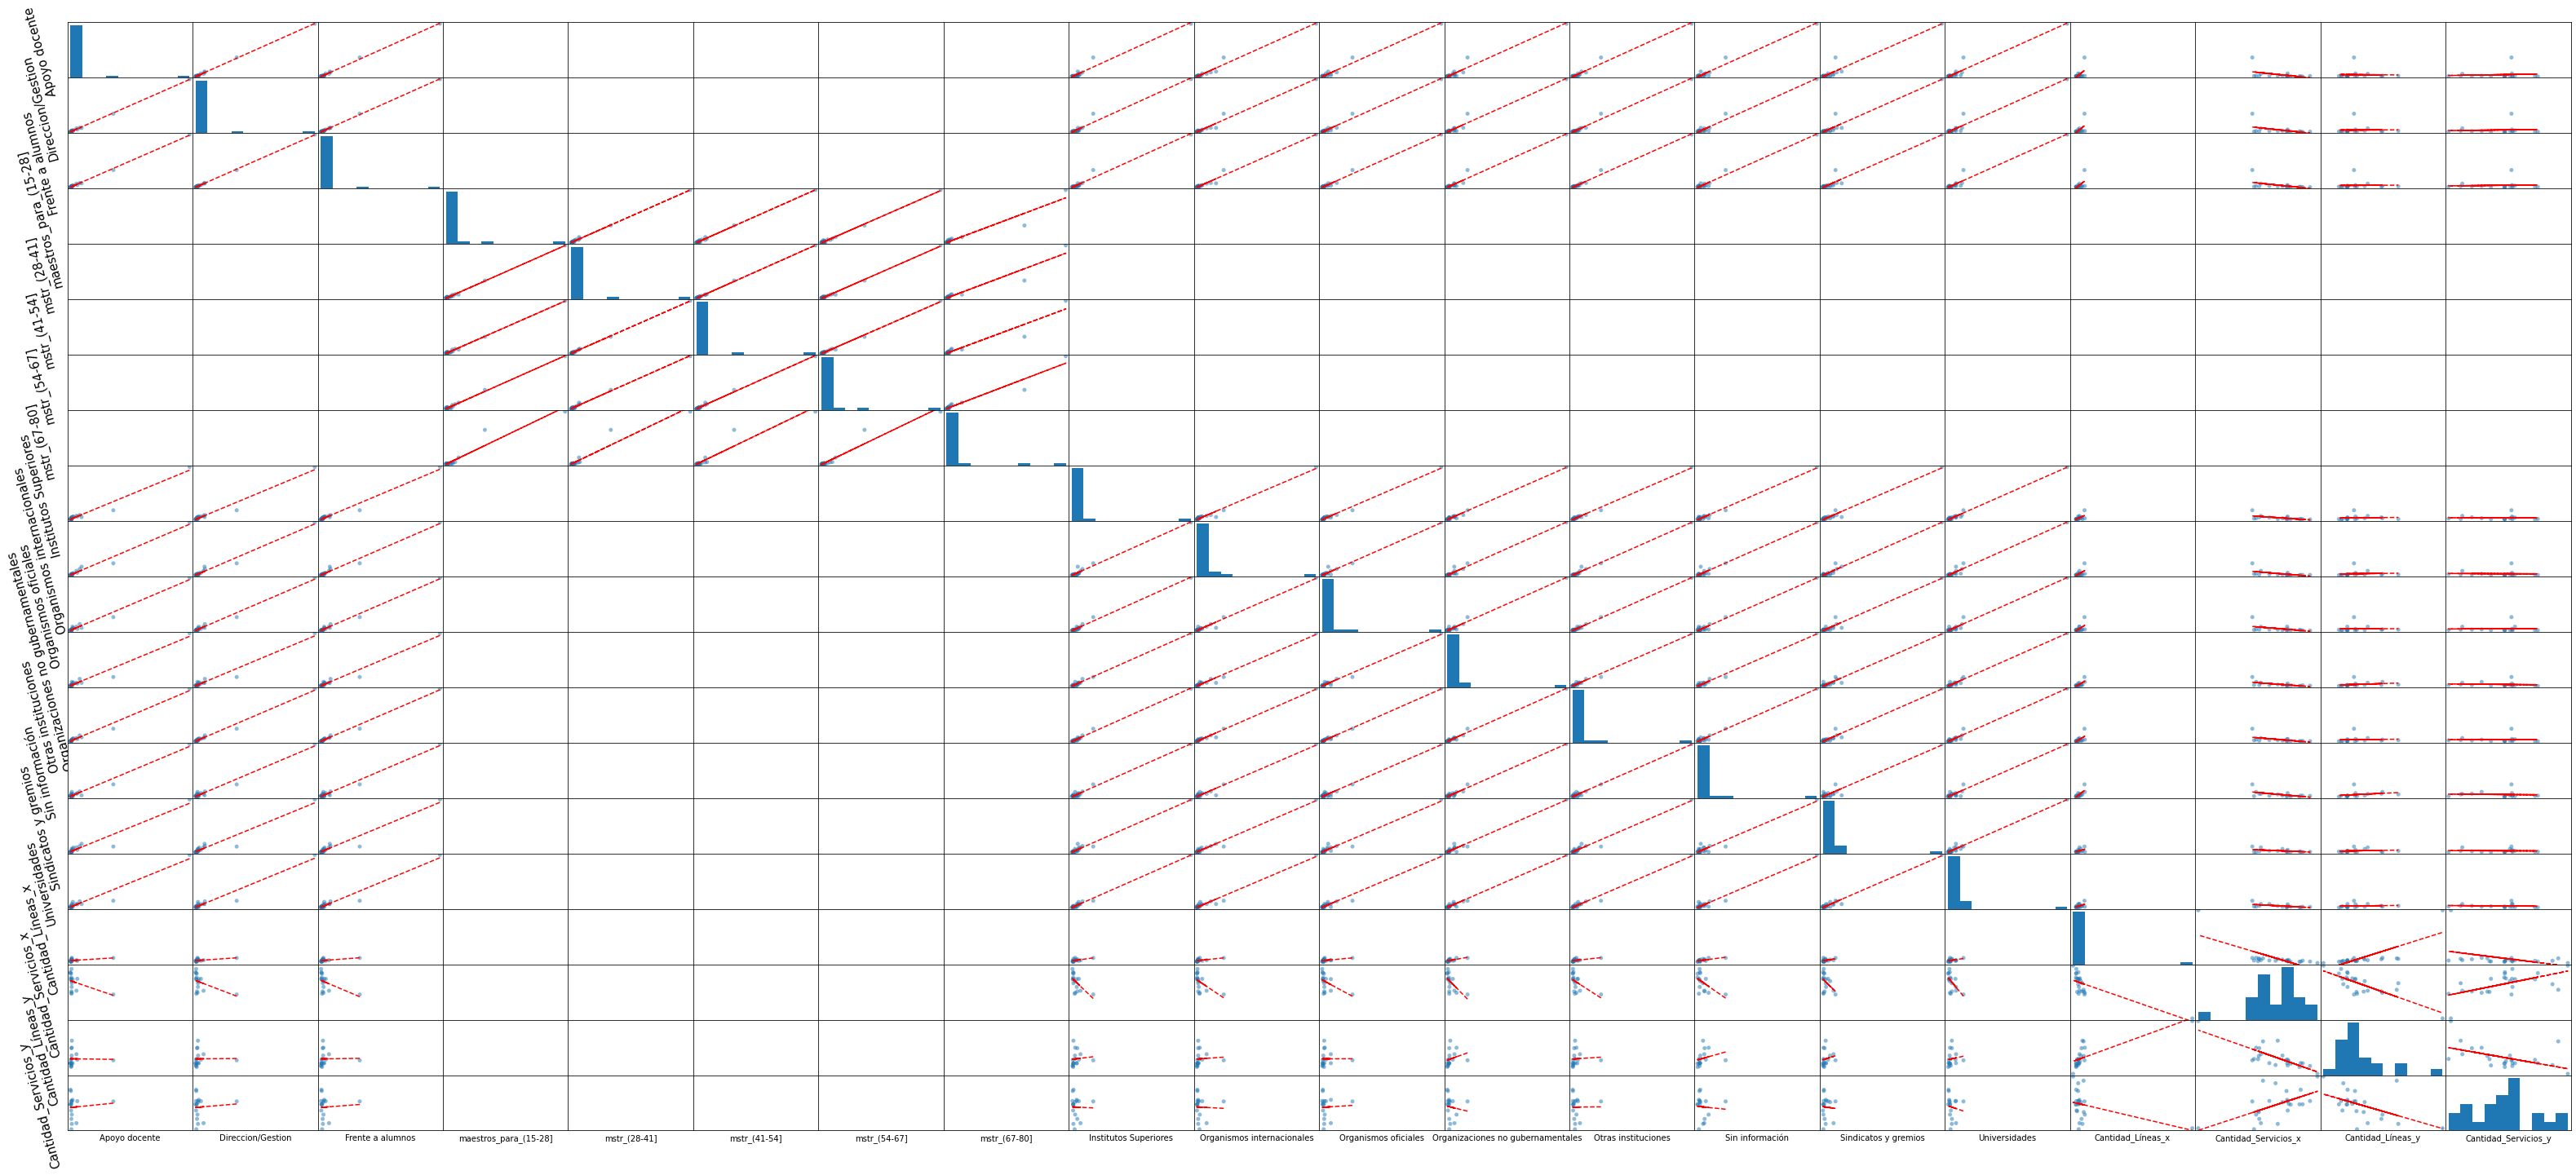

In [11]:
smat=scatter_matrix(merged,figsize=(55,25),s=100);
for subaxis in smat:
        for ax in subaxis:
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            ax.yaxis.label.set_size(15)
            ax.xaxis.label.set_size(10)
            ylab=ax.yaxis.label.get_text()
            ax.set_ylabel(ylab,rotation=105, labelpad=25)
            
            
            
            try:
                cs=ax.collections[0]
                csdf=pd.DataFrame(cs.get_offsets())
                xx=csdf.iloc[:,0].astype(float)
                yy=csdf.iloc[:,1].astype(float)
                z4 = np.polyfit(xx,yy, 1)
                p4= np.poly1d(z4)
                ax.plot(xx,p4(xx),"r--")
            except:
                pass
              

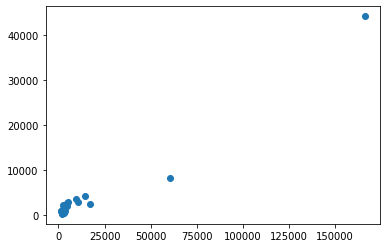

In [12]:
plt.figure()
plt.scatter(merged["Apoyo docente"],merged["Institutos Superiores"])

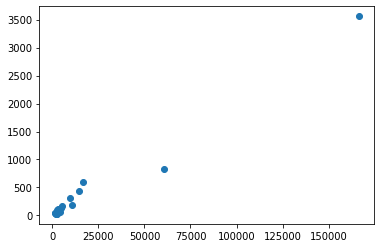

In [13]:
plt.figure()
plt.scatter(merged["Apoyo docente"],merged["Organismos internacionales"])